In [4]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# Load each dataset using exact filenames
df_nutrition = pd.read_csv("Data/Food_and_Nutrition__.csv")
df_raw = pd.read_csv("Data/detailed_meals_macros_.csv")
df_cleaned = pd.read_csv("Data/detailed_meals_macros_CLEANED.csv")


# Data exploration 

In [34]:
df_cleaned.head()
df_cleaned.info()
df_cleaned.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ages                     1698 non-null   int64  
 1   Gender                   1698 non-null   object 
 2   Height                   1698 non-null   int64  
 3   Weight                   1698 non-null   int64  
 4   Activity Level           1698 non-null   object 
 5   Dietary Preference       1698 non-null   object 
 6   Daily Calorie Target     1698 non-null   int64  
 7   Protein                  1698 non-null   int64  
 8   Sugar                    1698 non-null   float64
 9   Sodium                   1698 non-null   float64
 10  Calories                 1698 non-null   int64  
 11  Carbohydrates            1698 non-null   int64  
 12  Fiber                    1698 non-null   float64
 13  Fat                      1698 non-null   int64  
 14  Breakfast Suggestion    

,Ages,Height,Weight,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,...,Lunch Carbohydrates,Dinner Calories,Dinner Protein.1,Dinner Carbohydrates.1,Dinner Fats,Snacks Calories,Snacks Protein,Snacks Carbohydrates,Snacks Fats,Lunch Fats
count,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,...,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000
mean,43.961720,174.130153,78.064193,2275.171967,139.898115,126.192580,27.979623,2196.440518,252.385159,30.286219,...,68.725277,594.348716,45.234765,124.494605,43.383528,215.235571,6.902238,28.950530,11.037102,10.422261
std,15.915002,13.420936,16.949264,558.812405,53.326588,34.938902,10.665318,571.089569,69.877804,8.385337,...,84.843734,453.198878,119.518574,198.313817,90.973517,53.306442,2.915200,5.138153,5.366292,2.279813
min,18.000000,150.000000,48.000000,1200.000000,50.000000,60.000000,10.000000,990.000000,120.000000,14.400000,...,1.000000,5.000000,0.200000,1.000000,1.000000,100.000000,2.000000,10.000000,1.000000,6.000000
25%,30.000000,163.250000,64.000000,1800.000000,100.000000,100.000000,20.000000,1770.250000,200.000000,24.000000,...,26.000000,309.250000,17.400000,31.325000,18.000000,180.000000,5.000000,28.000000,8.000000,9.000000
50%,42.000000,174.000000,78.000000,2200.000000,136.000000,124.000000,27.200000,2146.000000,248.000000,29.760000,...,42.000000,486.000000,28.000000,60.075000,31.000000,180.000000,6.000000,30.000000,8.000000,10.000000
75%,57.000000,185.000000,91.000000,2689.000000,174.000000,150.000000,34.800000,2549.750000,300.000000,36.000000,...,75.000000,728.000000,46.425000,138.000000,49.000000,250.000000,8.000000,30.000000,15.000000,12.000000
max,79.000000,200.000000,119.000000,4364.000000,327.000000,218.000000,65.400000,4357.000000,436.000000,52.320000,...,1286.000000,5808.000000,2580.000000,2580.000000,1441.000000,350.000000,20.000000,40.000000,25.000000,20.000000


In [35]:
#Check for Missing or Strange Values
df_cleaned.isnull().sum()
df_cleaned.duplicated().sum()

np.int64(0)

In [36]:
#Split multi-disease entries into individual rows
df_exploded = df_cleaned.assign(Disease=df_cleaned['Disease'].str.split(', ')).explode('Disease')

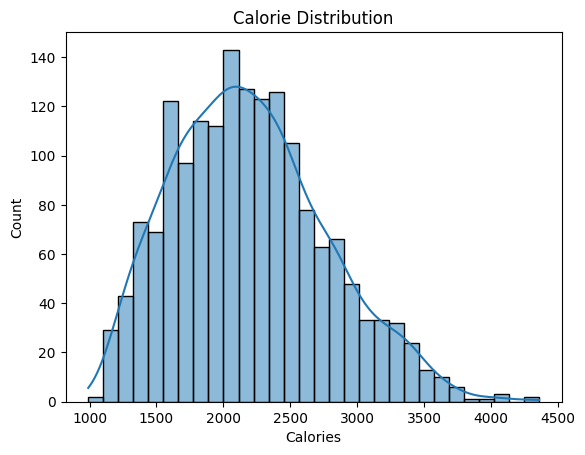

In [37]:
#Visualize Nutrient Distributions
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_cleaned['Calories'], bins=30, kde=True)
plt.title("Calorie Distribution")
plt.show()

In [38]:
#Sort diseases by frequency for cleaner plotting
order = df_exploded['Disease'].value_counts().index

In [39]:
print(df_cleaned.columns)


Index(['Ages', 'Gender', 'Height', 'Weight', 'Activity Level',
       'Dietary Preference', 'Daily Calorie Target', 'Protein', 'Sugar',
       'Sodium', 'Calories', 'Carbohydrates', 'Fiber', 'Fat',
       'Breakfast Suggestion', 'Breakfast Calories', 'Breakfast Protein',
       'Breakfast Carbohydrates', 'Breakfast Fats', 'Lunch Suggestion',
       'Lunch Calories', 'Lunch Protein', 'Lunch Carbohydrates',
       'Dinner Suggestion', 'Dinner Calories', 'Dinner Protein.1',
       'Dinner Carbohydrates.1', 'Dinner Fats', 'Snack Suggestion',
       'Snacks Calories', 'Snacks Protein', 'Snacks Carbohydrates',
       'Snacks Fats', 'Disease', 'Lunch Fats'],
      dtype='object')


/var/folders/6z/4mlvd88s7dbg464vrcdqyfmh0000gn/T/ipykernel_4347/3694013564.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Disease', data=df_exploded, order=order, palette='Set2')


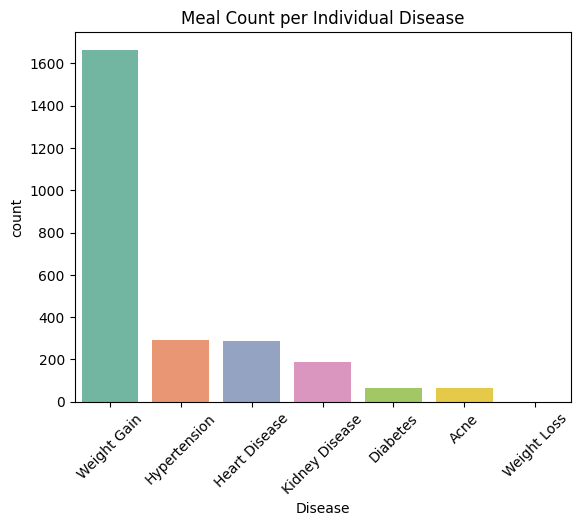

In [40]:
#Visualize disease counts
sns.countplot(x='Disease', data=df_exploded, order=order, palette='Set2')
plt.xticks(rotation=45)
plt.title("Meal Count per Individual Disease")
plt.show()


In [41]:
#save figures
for i in plt.get_fignums():
    fig = plt.figure(i)
    fig.savefig(f"pictures/diagram_{i}.png", dpi=300, bbox_inches='tight')


# Feature Engineering 

In [42]:
#Feature Selection
features = ['Calories', 'Protein', 'Carbohydrates', 'Sugar', 'Fat', 'Sodium']
target = 'Disease'


In [43]:
#Encode the Target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_exploded['Disease_encoded'] = le.fit_transform(df_exploded['Disease'])


In [44]:
#Split the Data
from sklearn.model_selection import train_test_split

X = df_exploded[features]
y = df_exploded['Disease_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modeling Checklist

In [45]:
#Train a Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [46]:
#Evaluate the Model
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.00      0.00      0.00        10
           2       0.03      0.03      0.03        59
           3       0.04      0.04      0.04        55
           4       0.10      0.13      0.11        39
           5       0.82      0.78      0.80       333

    accuracy                           0.53       514
   macro avg       0.16      0.16      0.16       514
weighted avg       0.54      0.53      0.53       514

Accuracy: 0.5252918287937743


# Model Evaluation & Improvement

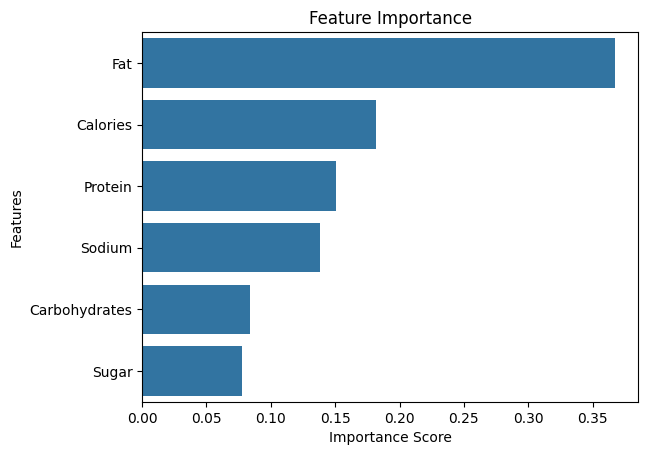

In [47]:
#Visualize Feature Importance
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [48]:
#Check for Class Imbalance
df_exploded['Disease'].value_counts()

Disease
Weight Gain       1664
Hypertension       292
Heart Disease      289
Kidney Disease     189
Diabetes            66
Acne                66
Weight Loss          1
Name: count, dtype: int64

### ⚠️ Class Imbalance 

- **Weight Gain** dominates the dataset (>60%), while **Weight Loss** has only 1 sample.
- This imbalance causes the model to favor the majority class.
- As a result, precision and recall for minority diseases (e.g., Diabetes, Acne) are very low.
- The model struggles to generalize and makes unfair predictions.


In [49]:
#Use Class Weights
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train) #ell the model to pay more attention to minority classes

RandomForestClassifier(class_weight='balanced', random_state=42)

In [50]:
#Install imbalanced-learn
!pip install imbalanced-learn

In [51]:
#First, define the label for Weight Loss (since you encoded diseases)
weight_loss_label = le.transform(['Weight Loss'])[0]


In [52]:
#Oversample Minority Classes
#Use SMOTE (Synthetic Minority Oversampling Technique)
from imblearn.over_sampling import SMOTE
from collections import Counter

# Remove Weight Loss before SMOTE
X_train_balanced = X_train[y_train != weight_loss_label]
y_train_balanced = y_train[y_train != weight_loss_label]

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_balanced, y_train_balanced)

print(Counter(y_resampled))


Counter({5: 1331, 2: 1331, 4: 1331, 3: 1331, 1: 1331, 0: 1331})


/Users/kaltunmustafemohamed/Documents-k/SEM-1 2025/topic research/Nutrition_Daily_meals_disease_case/nutrition_daily_meals_env/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [53]:
#Tune Hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)    #Improve Random Forest
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)


/Users/kaltunmustafemohamed/Documents-k/SEM-1 2025/topic research/Nutrition_Daily_meals_disease_case/nutrition_daily_meals_env/lib/python3.9/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


In [54]:
#Train your final model
best_model = grid.best_estimator_
best_model.fit(X_resampled, y_resampled)

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.12      0.22      0.16        18
           1       0.00      0.00      0.00        10
           2       0.06      0.05      0.05        59
           3       0.00      0.00      0.00        55
           4       0.16      0.33      0.22        39
           5       0.95      0.78      0.86       333

    accuracy                           0.54       514
   macro avg       0.21      0.23      0.21       514
weighted avg       0.64      0.54      0.58       514



# Boosting Algorithms (XGBoost & LightGBM)

In [55]:
#install xgboost
!pip install xgboost
!pip install lightgbm

In [56]:
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2]
}
xgb = XGBClassifier(random_state=42, eval_metric='mlogloss')
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=3, scoring='f1_macro')
grid_xgb.fit(X_resampled, y_resampled)
best_xgb = grid_xgb.best_estimator_

# LightGBM
param_grid_lgb = {
    'n_estimators': [100, 200],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.05, 0.1, 0.2]
}
lgbm = lgb.LGBMClassifier(random_state=42, verbose=-1)
grid_lgb = GridSearchCV(lgbm, param_grid_lgb, cv=3, scoring='f1_macro')
grid_lgb.fit(X_resampled, y_resampled)
best_lgb = grid_lgb.best_estimator_


# Evaluation of Boosting Models
Compare XGBoost and LightGBM against Random Forest using macro F1-score and confusion matrix.


In [57]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# XGBoost
y_pred_xgb = best_xgb.predict(X_test)
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb, digits=3))
print("XGBoost Macro F1:", f1_score(y_test, y_pred_xgb, average='macro'))

# LightGBM
y_pred_lgb = best_lgb.predict(X_test)
print("\nLightGBM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb, digits=3))
print("LightGBM Macro F1:", f1_score(y_test, y_pred_lgb, average='macro'))


XGBoost Confusion Matrix:
 [[  5  12   0   1   0   0]
 [  9   0   0   1   0   0]
 [  5   6   0  26  21   1]
 [  8   5  21   6  14   1]
 [  3   0   1  10  19   6]
 [  4   1  12  20  36 260]]
              precision    recall  f1-score   support

           0      0.147     0.278     0.192        18
           1      0.000     0.000     0.000        10
           2      0.000     0.000     0.000        59
           3      0.094     0.109     0.101        55
           4      0.211     0.487     0.295        39
           5      0.970     0.781     0.865       333

    accuracy                          0.564       514
   macro avg      0.237     0.276     0.242       514
weighted avg      0.660     0.564     0.600       514

XGBoost Macro F1: 0.2421577162461598

LightGBM Confusion Matrix:
 [[  5  11   1   1   0   0]
 [  9   0   0   1   0   0]
 [  6   5   1  24  21   2]
 [  8   5  24   1  14   3]
 [  2   1   2  10  15   9]
 [  4   1  15  18  35 260]]
              precision    recall  f1-

#  Visualization
Plot feature importance for both boosting algorithms.


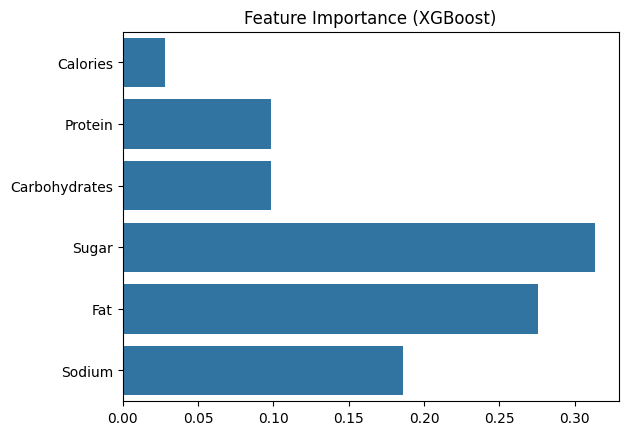

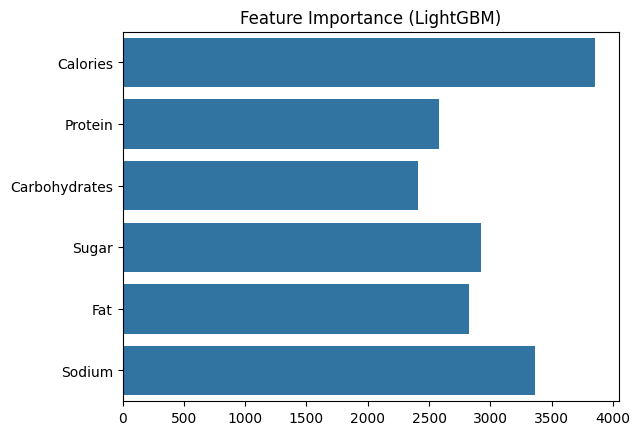

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# XGBoost feature importance
sns.barplot(x=best_xgb.feature_importances_, y=features)
plt.title("Feature Importance (XGBoost)")
plt.show()

# LightGBM feature importance
sns.barplot(x=best_lgb.feature_importances_, y=features)
plt.title("Feature Importance (LightGBM)")
plt.show()


# Model Comparison Summary

| Model       | Accuracy | Macro F1 | Class 0 F1 | Class 1 F1 | Class 2 F1 | Class 3 F1 | Class 4 F1 | Class 5 F1 |
|-------------|----------|----------|------------|------------|------------|------------|------------|------------|
| RandomForest| 0.564    | 0.240    | 0.192      | 0.000      | 0.070      | 0.020      | 0.310      | 0.870      |
| XGBoost     | 0.564    | 0.242    | 0.192      | 0.000      | 0.000      | 0.101      | 0.295      | 0.865      |
| LightGBM    | 0.549    | 0.221    | 0.192      | 0.000      | 0.020      | 0.018      | 0.242      | 0.857      |
